# yfinance란?

[yfinance](https://pypi.org/project/yfinance/)는 랜 애루시(Ran Aroussi)가 개발한 오픈 소스 라이브러리입니다. 이 라이브러리는 [야후 파이낸스(Yahoo! Finance)](https://finance.yahoo.com/)를 통해 금융 데이터를 액세스할 수 있도록 만들어졌습니다. 야후 파이낸스는 주식, 채권, 통화 및 암호화폐에 대한 광범위한 시장 데이터를 제공하고 있습니다.

yfinance 패키지 설치

# yfinance의 기본구조

In [1]:
import yfinance as yf

### 티커 객체 정의하기

`yfinance`를 사용하기 위해서는 먼저 티커를 선택하고 이를 객체화하는 작업이 필요합니다. 티커(Ticker)란 금융시장에서 특정 종목을 표현하는 약자를 의미합니다. 가령 애플의 경우 주식시장에서 'AAPL'이라는 티커를 가지고 있고, 마이크로소프트의 경우 'MSFT'라는 티커를 가지고 있습니다. 이 티커는 당연히 각 종목별로 고유한 값입니다. `yfinance`에서는 티커를 객체화하기 위해 `Ticker()`라는 메서드를 사용하고 있습니다. 여기서는 간단하게 애플의 티커 객체를 구현해보겠습니다.

In [2]:
aapl = yf.Ticker('AAPL')
print(aapl)

yfinance.Ticker object <AAPL>


### 종목 기본정보

이제 티커를 정의했으니 해당 종목이 어떤 종목인지 기본적인 정보를 출력해보겠습니다. 티커 객체는 `info`라는 속성(Attribute)을 가지고 있습니다. 이를 활용하면 종목에 대한 세세한 정보를 얻을 수 있습니다. 

In [3]:
aapl.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

### 시장 데이터 다운로드

종목의 과거 가격 및 거래량에 대한 데이터를 다운받기 위해서는 `history()`라는 메서드를 사용하면 됩니다. 이 메서드는 단일 종목 혹은 여러 종목들에 대한 시장 데이터를 가져와 우리에게 전달해주는 역할을 하고 있습니다.

우선 가장 단순하게 구현을 하기 위해 애플 주식의 가능한 한 많은 일별 데이터를 가져와보도록 하겠습니다.

In [4]:
data = aapl.history(period='max')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-16 00:00:00-04:00,186.729996,186.990005,184.270004,184.919998,101235600,0.0,0.0
2023-06-20 00:00:00-04:00,184.410004,186.100006,184.410004,185.009995,49799100,0.0,0.0
2023-06-21 00:00:00-04:00,184.899994,185.410004,182.589996,183.960007,49515700,0.0,0.0


애플 주식에 대한 과거 데이터가 잘 들어오는 것을 확인할 수 있습니다. 간단히 종가를 기준으로 가격 그래프를 만들어보겠습니다. 앞으로 우리는 이 `history()` 메서드를 사용하여 여러 ETF들에 대한 과거 데이터를 다운받아 사용할 것입니다.

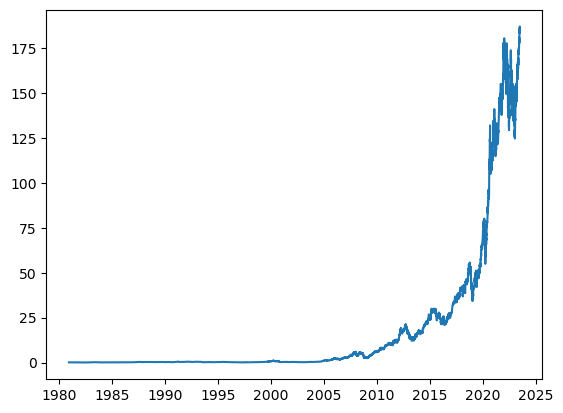

In [5]:
import matplotlib.pyplot as plt
plt.plot(data['Close'])

`history()` 메서드는 몇 가지 인자를 받아 이에 맞게 데이터 쿼리 작업을 처리할 수 있습니다. 아래는 `history()` 메서드가 가지고 있는 인자(Parameter)와 이에 대한 설명입니다.


- `period` : 데이터를 다운받을 기간을 설정합니다. 기본값은 한달(`1mo`)입니다. (`1d`, `5d`, `1mo`, `3mo`, `6mo`, `1y`, `2y`, `5y`, `10y`, `ytd`, `max`)
- `interval` : 데이터의 주기를 설정합니다. 주기를 일별보다 낮은 장중으로 설정할 경우 최대 60일간의 데이터만 제공합니다. 기본값은 하루(`1d`)입니다. (`1m`, `2m`, `5m`, `15m`, `30m`, `60m`, `90m`, `1h`, `1d`, `5d`, `1wk`, `1mo`, `3mo`)
- `start` : `period` 인자를 사용하지 않을 경우 데이터의 시작일을 설정합니다. `'YYYY-MM-DD'` 문자열을 사용하거나 `datetime` 형식의 날짜를 사용합니다.
- `end` : `period` 인자를 사용하지 않을 경우 데이터의 종료일을 설정합니다. `'YYYY-MM-DD'` 문자열을 사용하거나 `datetime` 형식의 날짜를 사용합니다.
- `prepost` : 시간외거래의 데이터를 결과에 포함시킬것인지를 설정합니다. 기본값은 `False`입니다.
- `auto_adjust` : 자동으로 수정주가를 사용할 것인지를 설정합니다. 기본값은 `True`입니다.
- `actions` : 주식의 경우 배당이나 주식 분할 같은 기업공시 이벤트를 다운받을지를 설정합니다. 기본값은 `True`입니다.

In [6]:
data = aapl.history(start='2015-01-01', end='2022-03-11', actions=False)
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-04 00:00:00-05:00,163.273748,164.325908,160.901421,161.963501,83737200
2022-03-07 00:00:00-05:00,162.152093,163.799823,157.864029,158.122116,96418800
2022-03-08 00:00:00-05:00,157.645665,161.675642,154.647991,156.275864,131148300
2022-03-09 00:00:00-05:00,160.286001,162.201738,158.231314,161.745132,91454900
2022-03-10 00:00:00-05:00,159.015440,159.204038,154.826643,157.347870,105342000


<Axes: xlabel='Date'>

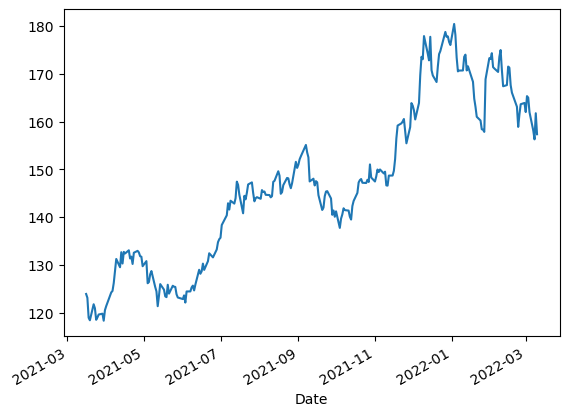

In [7]:
data['Close'].iloc[-250:].plot()

### 기타 데이터 다운로드

`yfinance`는 가격 데이터 뿐만 아니라 재무 데이터, 대주주 보유 현황, 애널리스트 의견, 뉴스 데이터 또한 제공합니다. 아래의 리스트는 `yfinance`를 통해 얻을 수 있는 주요 데이터를 가져올 수 있는 속성값들입니다.

- `financials` : 연도별 재무제표
- `quarterly_financials` : 분기별 재무제표
- `balance_sheet` : 연도별 대차대조표
- `quarterly_balance_sheet` : 분기별 대차대조표
- `cashflow` : 연도별 현금흐름표
- `quaterly_cashflow` : 분기별 현금흐름표
- `earnings` : 연도별 실적
- `quarterly_earnings` : 분기별 실적
- `institutional_holders` : 주요 기관 대주주 보유현황
- `recommendations` : 애널리스트 의견
- `news` : 최근 뉴스

# yfinance로 ETF 가격 데이터 다운로드하기

### 여러 종목 데이터 한꺼번에 받기

지금까지는 단일 종목에 대한 데이터 쿼리에 대해서만 다루었습니다. 그런데 만약  여러 종목들에 대한 데이터를 한꺼번에 받고 싶다면 어떻게 해야할까요? 이런 경우에도 방법은 똑같습니다. 다만 여러 종목들에 대한 티커 객체를 만들고자 한다면 `Ticker()` 메서드가 아닌 `Tickers()` 메서드를 사용해야 합니다. SPY와 TLT, 두 가지 ETF의 가격 데이터를 다운로드해보겠습니다. SPY는 S&P 500 지수를 추종하는 ETF이며, TLT는 미국 장기채를 추종하는 ETF입니다. 각각 미국 주식과 미국 채권을 대표하는 ETF라고 할 수 있습니다.

In [8]:
tickers = ['SPY', 'TLT']

etf = yf.Tickers(tickers)

data = etf.history(start='2002-08-01', actions=False)
data

[*********************100%***********************]  2 of 2 completed


Close                    High                     Low  \
                   SPY         TLT         SPY         TLT         SPY   
Date                                                                     
2002-08-01   59.474277   41.453640   61.195936   41.463627   59.172822   
2002-08-02   58.141190   41.878216   59.561393   42.003076   57.357400   
2002-08-05   56.118061   42.062954   58.234968   42.172832   55.970686   
2002-08-06   58.007217   41.703396   58.884799   41.903173   57.015758   
2002-08-07   59.018757   41.803291   59.286720   42.023047   57.457874   
...                ...         ...         ...         ...         ...   
2023-06-16  439.459991  102.599998  443.609985  102.830002  438.970001   
2023-06-20  437.179993  103.309998  438.369995  103.660004  435.029999   
2023-06-21  434.940002  103.559998  436.989990  103.650002  434.329987   
2023-06-22  436.510010  102.309998  436.619995  103.250000  433.600006   
2023-06-23  433.209991  103.330002  435.059998  103.949997  432.470001   

                              Open                 Volume            
                   TLT         SPY         TLT        SPY       TLT  
Date                                                                 
2002-08-01   41.223897   60.881080   41.223897   66571900     25000  
2002-08-02   41.393756   59.286729   41.533603   51772900     52800  
2002-08-05   41.878159   57.940207   41.973054   47191300     61100  
2002-08-06   41.563553   57.096149   41.888191   64730000     64900  
2002-08-07   41.633483   58.864681   41.753348   43289400     40300  
...                ...         ...         ...        ...       ...  
2023-06-16  102.029999  443.019989  102.440002  114121300  16758200  
2023-06-20  103.110001  437.450012  103.110001   76160400  17162900  
2023-06-21  102.339996  436.160004  102.809998   76982300  19720100  
2023-06-22  102.199997  433.950012  102.800003   70637200  23630700  
2023-06-23  102.980003  432.929993  103.830002   92028700  22896800  

[5260 rows x 10 columns]

각각의 ETF에 대해 OHLCV 데이터가 들어오는 것을 확인할 수 있습니다. 만약 종가 데이터만 필요하다면 판다스 데이터프레임의 [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)과 [`droplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) 메서드를 사용해 데이터를 축약할 수 있습니다.

In [9]:
data.drop(['Open', 'Low', 'High', 'Volume'], inplace=True, axis=1)
data

Close            
                   SPY         TLT
Date                              
2002-08-01   59.474277   41.453640
2002-08-02   58.141190   41.878216
2002-08-05   56.118061   42.062954
2002-08-06   58.007217   41.703396
2002-08-07   59.018757   41.803291
...                ...         ...
2023-06-16  439.459991  102.599998
2023-06-20  437.179993  103.309998
2023-06-21  434.940002  103.559998
2023-06-22  436.510010  102.309998
2023-06-23  433.209991  103.330002

[5260 rows x 2 columns]

In [10]:
data = data.droplevel(0, axis=1)
data

,SPY,TLT
Date,,
2002-08-01,59.474277,41.453640
2002-08-02,58.141190,41.878216
2002-08-05,56.118061,42.062954
2002-08-06,58.007217,41.703396
2002-08-07,59.018757,41.803291
...,...,...
2023-06-16,439.459991,102.599998
2023-06-20,437.179993,103.309998
2023-06-21,434.940002,103.559998


<Axes: xlabel='Date'>

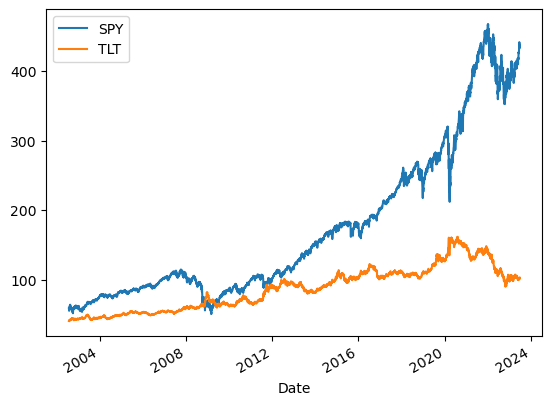

In [11]:
data.plot()

### 입력변수: 수익률, 변동성, 상관계수

#### 1. 수익률

Text(0, 0.5, 'Returns')

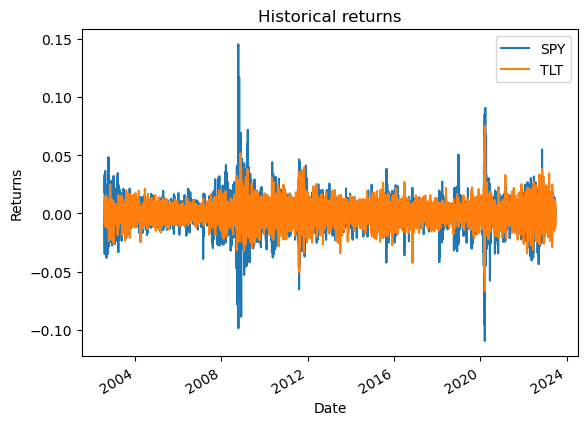

In [12]:
# 수익률 계산
rets = data.pct_change().fillna(0)

# 수익률 데이터 확인
rets.head()

# 수익률 데이터 시각화
rets.plot()
plt.title('Historical returns')
plt.xlabel('Date')
plt.ylabel('Returns')

#### 2. 변동성

In [13]:
import numpy as np

Text(0, 0.5, 'Vols')

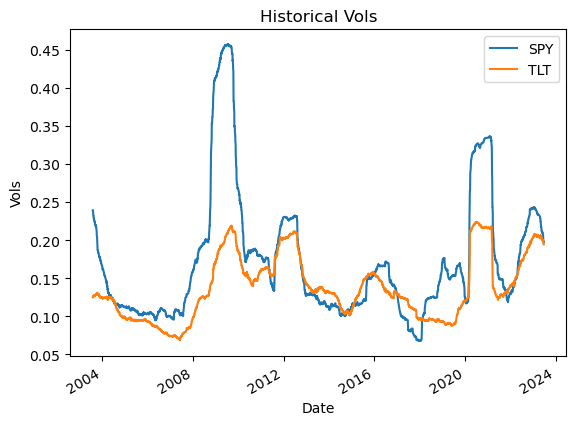

In [14]:
# 전체 기간 변동성 계산
total_vols = rets.std() * np.sqrt(252)
total_vols

# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(252).std() * np.sqrt(252)
vols

# 변동성 시각화
vols.plot()
plt.title('Historical Vols')
plt.xlabel('Date')
plt.ylabel('Vols')

#### 3. 상관계수

Text(0, 0.5, 'Correlation')

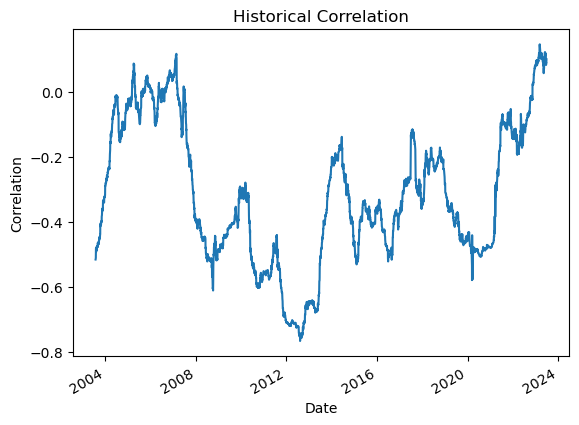

In [15]:
# SPY와 TLT의 수익률
spy_rets = rets['SPY']
tlt_rets = rets['TLT']

# 전체 기간 상관계수 계산
total_corr = spy_rets.corr(tlt_rets)
total_corr

# 1년 단위 롤링 상관계수 계산
corr = spy_rets.rolling(252).corr(tlt_rets)
corr

# 상관계수 시각화
corr.plot()
plt.title('Historical Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')

#### 4. ETF 유니버스 데이터 처리

#### ETF 유니버스

| Ticker | Sector |
| ------ | -----  |
| XLB | 소재 |
| XLE | 에너지 |
| XLF | 금융 |
| XLI | 산업재 |
| XLK | IT |
| XLP | 필수소비재 |
| XLU | 유틸리티 |
| XLV | 헬스케어 |
| XLY | 임의소비재 |

In [16]:
# ETF 유니버스 티커 설정
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

# 티커 객체 선언
yfObj = yf.Tickers(tickers)

# 과거 데이터 다운로드
df = yfObj.history(start='2011-01-01', end='2022-10-14')

# 종가를 제외한 나머지 컬럼 삭제
df.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], inplace=True, axis=1)

# NaN 값을 이전 값으로 채워넣기
df.ffill(inplace=True)

# 첫 번째 칼럼 레벨 삭제
df = df.droplevel(0, axis=1)

# 주간 단위로 데이터 재설정
df = df.resample('W').last()

[*********************100%***********************]  9 of 9 completed


In [17]:
df

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,
2011-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.575193,44.580605,10.423412,27.640417,21.443022,20.788721,20.468702,25.956959,32.091427
2011-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.953476,46.127998,10.744724,28.149950,21.792772,21.003557,20.572405,26.045984,32.278694
2011-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.934446,45.768909,10.577641,28.142113,21.418041,21.118139,20.708517,26.054079,32.193584
2011-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.189201,46.428341,10.442692,28.087238,21.509642,20.752916,20.514076,25.584635,31.580677
2011-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.555630,48.400127,10.674038,28.831944,22.225798,20.982071,20.611296,26.167398,32.525566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.361511,75.346054,32.375393,87.651680,127.476379,69.534477,72.250725,125.415764,156.386490
2022-09-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.364716,68.438148,30.566971,83.668182,122.856598,68.073509,70.093040,121.252510,145.283340
2022-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.951248,69.933533,29.887705,81.782562,117.932007,65.473419,63.988228,119.652008,141.344162


<Axes: xlabel='Date'>

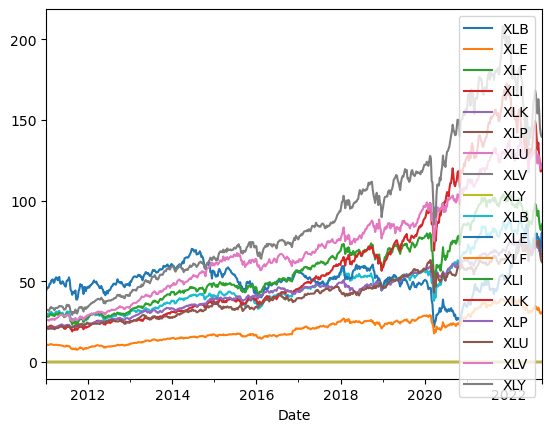

In [18]:
# 역사적 가격 그래프 시각화
df.plot()

<Axes: xlabel='Date'>

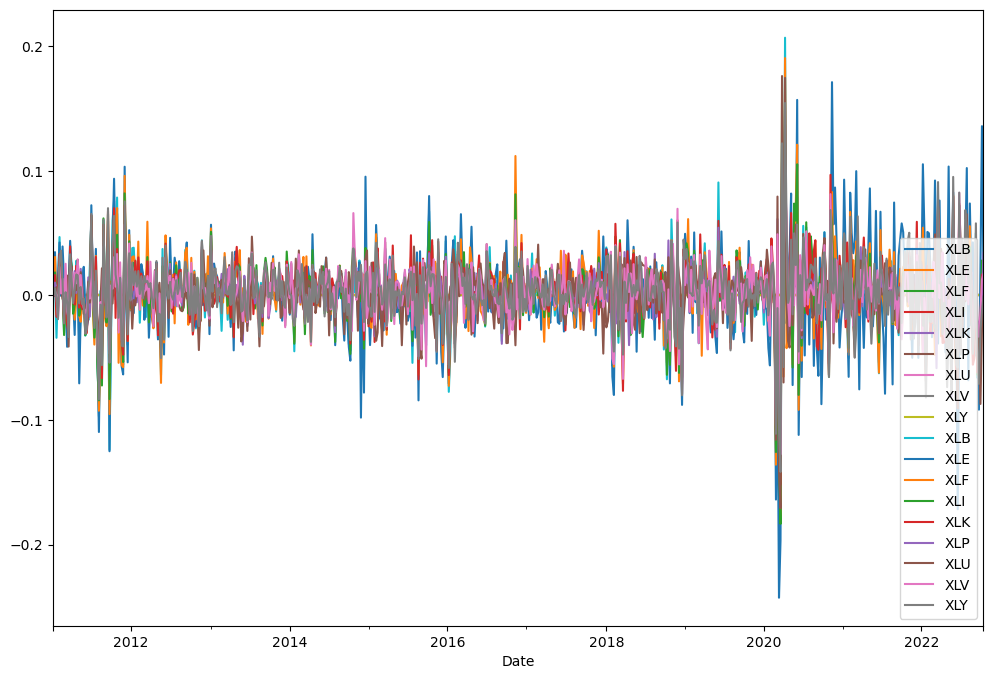

In [19]:
# ETF 수익률 계산
rets = df.pct_change().fillna(0)

# 수익률 시각화
rets.plot(figsize=(12, 8))

<Axes: xlabel='Date'>

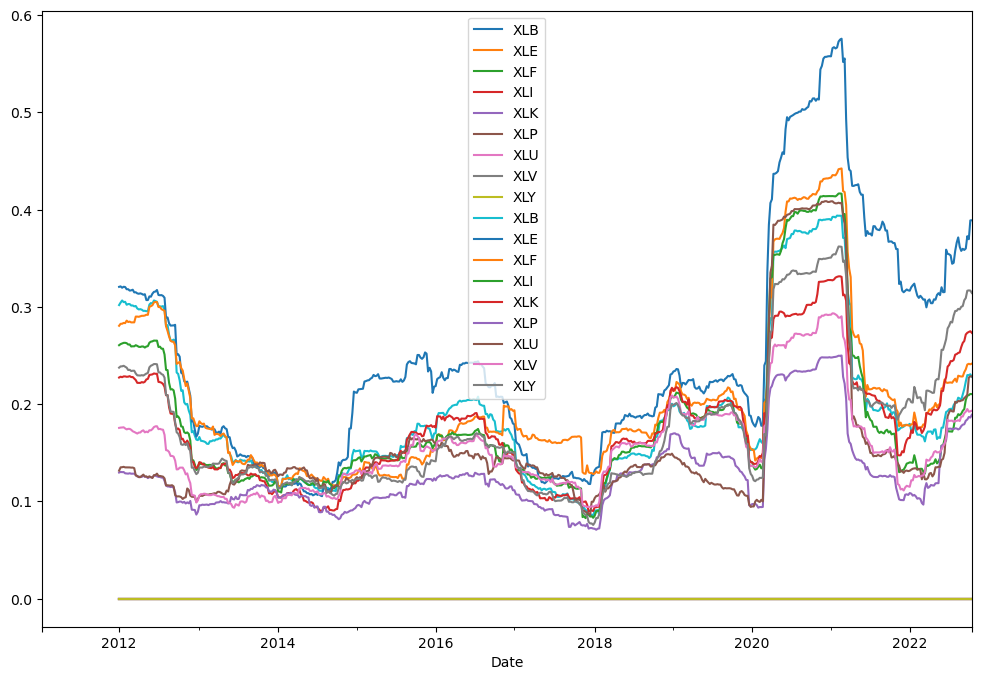

In [20]:
# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(52).std() * np.sqrt(52)

# 변동성 시각화
vols.plot(figsize=(12, 8))

In [21]:
# 전체 기간 ETF 상관계수 계산
corr = rets.corr()
corr

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.719690,0.829265,0.886239,0.737775,0.612624,0.502272,0.684392,0.774422


<Axes: >

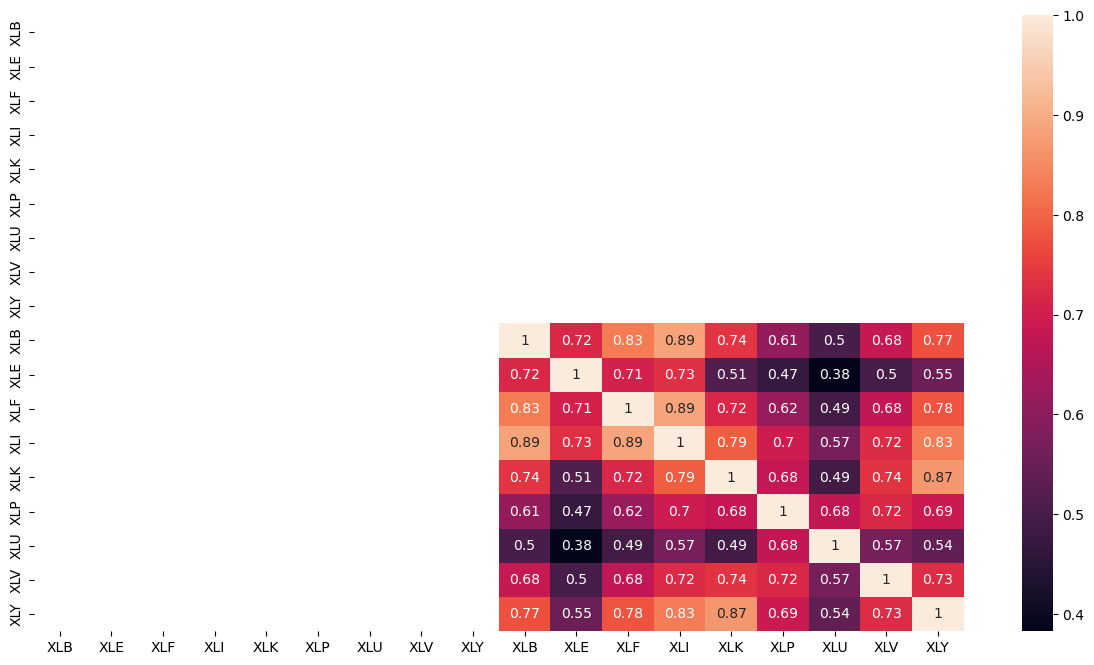

In [22]:
# seaborn 패키지 임포트
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

##### 공분산 행렬 특징 이해하기

In [23]:
# 공분산 계산 및 연율화
cov = rets.cov() * 52
cov

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XLB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043178,0.041900,0.037557,0.036560,0.029055,0.017391,0.018630,0.023177,0.031572


In [24]:
# var() 메서드를 사용한 ETF 분산 계산
vols_1 = rets.var() * 52
vols_1

XLB    0.000000
XLE    0.000000
XLF    0.000000
XLI    0.000000
XLK    0.000000
XLP    0.000000
XLU    0.000000
XLV    0.000000
XLY    0.000000
XLB    0.043178
XLE    0.078500
XLF    0.047506
XLI    0.039413
XLK    0.035919
XLP    0.018665
XLU    0.031863
XLV    0.026561
XLY    0.038494
dtype: float64

In [25]:
# 공분산 행렬 및 diag() 메서드를 사용한 ETF 분산 계산
vols_2 = np.diag(cov)
vols_2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04317779,
       0.07850004, 0.04750551, 0.03941327, 0.03591859, 0.01866469,
       0.03186309, 0.0265608 , 0.03849361])

# 주식-채권 배분 모델

### 패키지 임포트

In [26]:
# 패키지 임포트
import numpy as np
import yfinance as yf
import seaborn as sns
sns.set()

### 가격 데이터 다운로드 및 전처리

In [27]:
# 티커
tickers = ['SPY', 'TLT']

# 티커 객체
etf = yf.Tickers(tickers)

# 데이터 다운로드
data = etf.history(start='2002-08-01', actions=False)
data

[*********************100%***********************]  2 of 2 completed


Close                    High                     Low  \
                   SPY         TLT         SPY         TLT         SPY   
Date                                                                     
2002-08-01   59.474327   41.453648   61.195987   41.463635   59.172871   
2002-08-02   58.141174   41.878212   59.561378   42.003072   57.357385   
2002-08-05   56.118042   42.063004   58.234948   42.172881   55.970667   
2002-08-06   58.007229   41.703407   58.884810   41.903185   57.015770   
2002-08-07   59.018734   41.803253   59.286697   42.023009   57.457851   
...                ...         ...         ...         ...         ...   
2023-06-16  439.459991  102.599998  443.609985  102.830002  438.970001   
2023-06-20  437.179993  103.309998  438.369995  103.660004  435.029999   
2023-06-21  434.940002  103.559998  436.989990  103.650002  434.329987   
2023-06-22  436.510010  102.309998  436.619995  103.250000  433.600006   
2023-06-23  433.209991  103.330002  435.059998  103.949997  432.470001   

                              Open                 Volume            
                   TLT         SPY         TLT        SPY       TLT  
Date                                                                 
2002-08-01   41.223905   60.881130   41.223905   66571900     25000  
2002-08-02   41.393753   59.286714   41.533600   51772900     52800  
2002-08-05   41.878209   57.940188   41.973104   47191300     61100  
2002-08-06   41.563564   57.096160   41.888202   64730000     64900  
2002-08-07   41.633445   58.864658   41.753310   43289400     40300  
...                ...         ...         ...        ...       ...  
2023-06-16  102.029999  443.019989  102.440002  114121300  16758200  
2023-06-20  103.110001  437.450012  103.110001   76160400  17162900  
2023-06-21  102.339996  436.160004  102.809998   76982300  19720100  
2023-06-22  102.199997  433.950012  102.800003   70637200  23630700  
2023-06-23  102.980003  432.929993  103.830002   92028700  22896800  

[5260 rows x 10 columns]

In [28]:
# 불필요한 칼럼 제거
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data

Close            
                   SPY         TLT
Date                              
2002-08-01   59.474327   41.453648
2002-08-02   58.141174   41.878212
2002-08-05   56.118042   42.063004
2002-08-06   58.007229   41.703407
2002-08-07   59.018734   41.803253
...                ...         ...
2023-06-16  439.459991  102.599998
2023-06-20  437.179993  103.309998
2023-06-21  434.940002  103.559998
2023-06-22  436.510010  102.309998
2023-06-23  433.209991  103.330002

[5260 rows x 2 columns]

In [29]:
# 0 레벨 칼럼 제목 제거
data = data.droplevel(0, axis=1)
data

,SPY,TLT
Date,,
2002-08-01,59.474327,41.453648
2002-08-02,58.141174,41.878212
2002-08-05,56.118042,42.063004
2002-08-06,58.007229,41.703407
2002-08-07,59.018734,41.803253
...,...,...
2023-06-16,439.459991,102.599998
2023-06-20,437.179993,103.309998
2023-06-21,434.940002,103.559998


<Axes: xlabel='Date'>

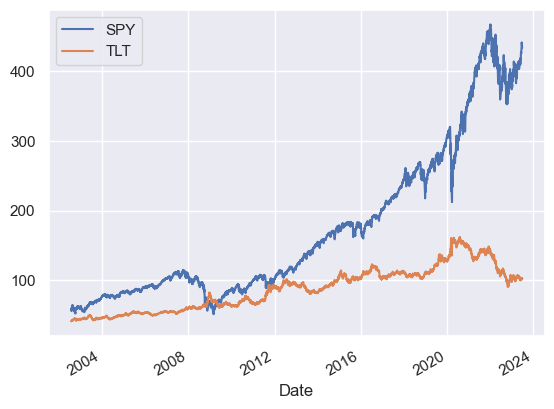

In [30]:
# 가격 그래프
data.plot()

### 일별 수익률 데이터

<Axes: xlabel='Date'>

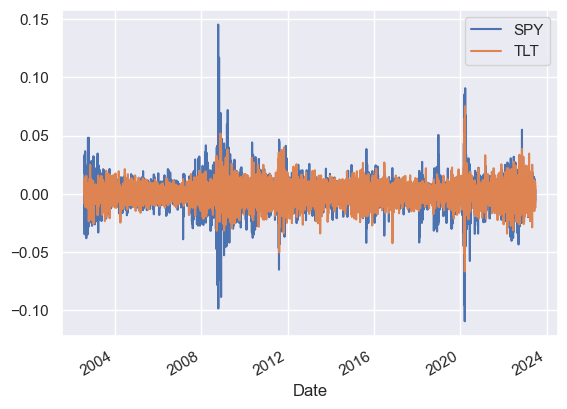

In [31]:
# 일별 수익률 데이터
rets = data.pct_change().fillna(0)

# 수익률 데이터 시각화
rets.plot()

### 개별 자산 평균 수익률과 변동성, 샤프비율

In [32]:
# 주식 기대 수익률과 변동성
stock_mu = rets['SPY'].mean() * 252
stock_sigma = rets['SPY'].std() * np.sqrt(252)

# 주식 샤프 비율
stock_sr = stock_mu / stock_sigma

# 채권 기대 수익률과 변동성
bond_mu = rets['TLT'].mean() * 252
bond_sigma = rets['TLT'].std() * np.sqrt(252)

# 채권 샤프 비율
bond_sr = bond_mu / bond_sigma

# 결과 출력
print(stock_sr, bond_sr)

0.590022559319635 0.37654284539041183


### 60-40 포트폴리오 구현

In [33]:
# 주식 가중치 60%, 채권 가중치 40%
weights = 0.6

In [34]:
# 포트폴리오 수익률
port_ret = weights * rets['SPY'] + (1 - weights) * rets['TLT']

In [35]:
# NaN 값 제거
port_ret.dropna(inplace=True)

In [36]:
# 결과 출력
port_ret

Date
2002-08-01    0.000000
2002-08-02   -0.009353
2002-08-05   -0.019113
2002-08-06    0.016779
2002-08-07    0.011420
                ...   
2023-06-16   -0.003597
2023-06-20   -0.000345
2023-06-21   -0.002106
2023-06-22   -0.002662
2023-06-23   -0.000548
Length: 5260, dtype: float64

<Axes: xlabel='Date'>

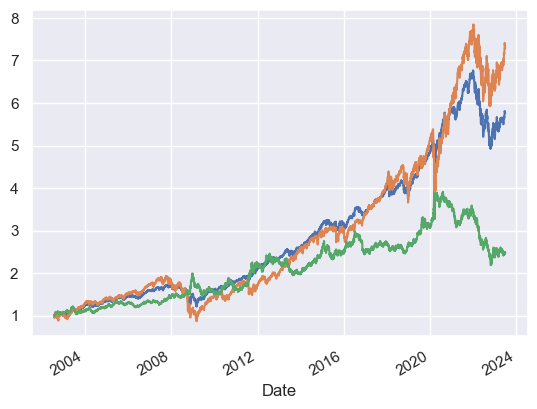

In [37]:
# 그래프 시각화
(1 + port_ret).cumprod().plot()
(1 + rets['SPY']).cumprod().plot()
(1 + rets['TLT']).cumprod().plot()

### 포트폴리오 수익률과 변동성 분석

In [38]:
# 포트폴리오 기대수익률
port_mu = port_ret.mean() * 252

# 포트폴리오 변동성
port_sigma = port_ret.std() * np.sqrt(252)

# 결과 출력
print('Returns = {}'.format(port_mu))
print('Vol = {}'.format(port_sigma))
print('SR = {}'.format(port_mu / port_sigma))

Returns = 0.08987442403408882
Vol = 0.1094451609727879
SR = 0.8211822545213754


### 주식-채권 상관계수 분석

In [39]:
# 1년 롤링 상관계수
historical_corr = rets['SPY'].rolling(252).corr(rets['TLT'])


<Axes: xlabel='Date'>

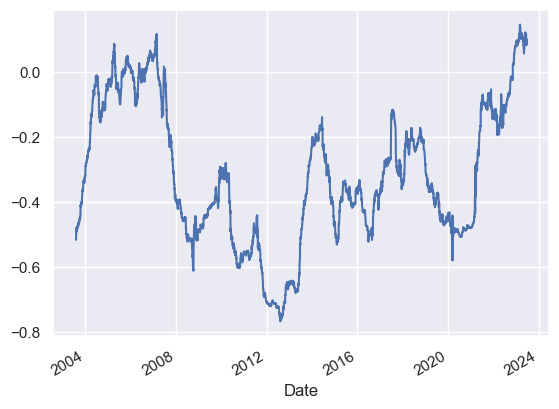

In [40]:
# 롤링 상관계수 시각화
historical_corr.plot()